In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/DataAnalysis-Folder/students.csv" .
df = pd.read_csv("students.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
df =  df.drop("Unnamed: 0", axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

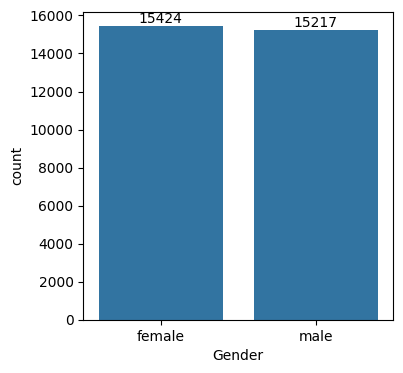

In [ ]:
plt.figure(figsize= (4,4))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show

In [ ]:
gb = df.groupby("ParentEduc").agg({"MathScore" : 'mean', "ReadingScore" : 'mean', "WritingScore" : 'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


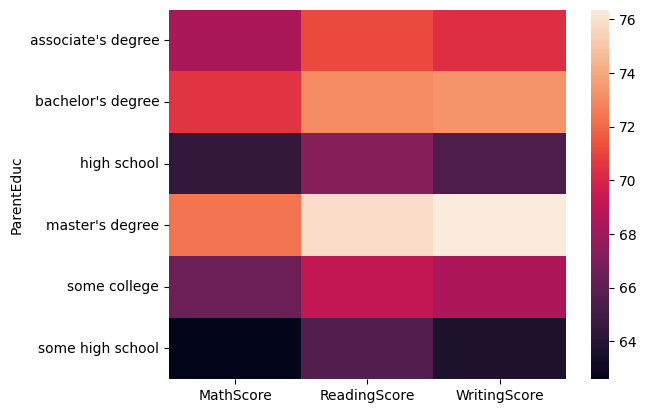

In [ ]:
sns.heatmap(gb)
plt.show()

We have analyzed that there is major difference due to Parent's Education so our Result will be - Yes Parent's Education effects child Education Result

In [ ]:
gb1 = df.groupby("WklyStudyHours").agg({"MathScore" : 'mean', "ReadingScore" : 'mean', "WritingScore" : 'mean'})
print(gb1)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


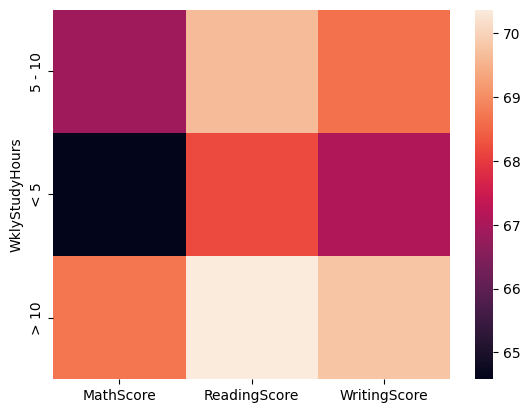

In [ ]:
sns.heatmap(gb1)
plt.show()

We have Analyzed that yes Weekly Study Hours Effect the Result of Child We can see that the lowest hours has lowest Result. So, Conclusion is that Weekly Hours effect the Results.

In [ ]:
gb2 = df.groupby("TransportMeans").agg({"MathScore" : 'mean', "ReadingScore" : 'mean', "WritingScore" : 'mean'})
print(gb2)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


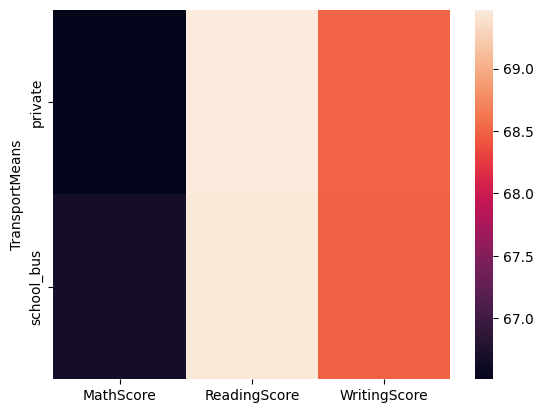

In [ ]:
sns.heatmap(gb2)
plt.show()

We have Analyzed that Transport Means don't effect results of Child Education.

In [ ]:
gb3 = df.groupby("PracticeSport").agg({"MathScore" : 'mean', "ReadingScore" : 'mean', "WritingScore" : 'mean'})
print(gb3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


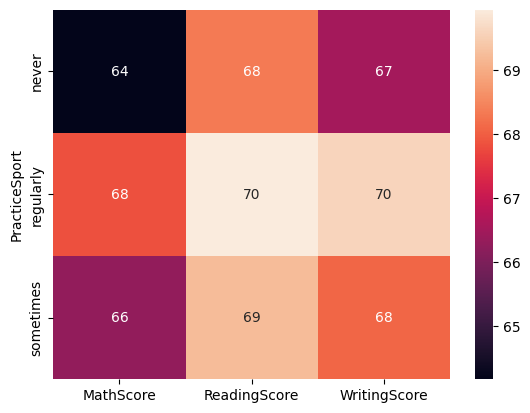

In [ ]:
sns.heatmap(gb3, annot = True)
plt.show()

We have Analyzed that Practicing sports is also affecting the Result of the Student. We can see avg or medium difference in result. But the conclusion is that the guy who never interacts is scoring low compared to the guy who is regular in this field.